<a href="https://colab.research.google.com/github/Garuooo/Insurance-prediction-DL-model/blob/main/Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. import the required depencies


In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 2. get and preprocess the data

In [19]:
csv = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
csv

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [20]:
# normalize the data
csv["bmi"] = csv["bmi"] / csv['bmi'].max()
csv["age"] = csv["age"] / 100
max_charges= csv['charges'].max()
csv["charges"] = csv["charges"]/max_charges

In [21]:
# do one hot encoding
csv= pd.get_dummies(csv)

In [22]:
csv

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.19,0.525127,0,0.264777,1,0,0,1,0,0,0,1
1,0.18,0.635611,1,0.027059,0,1,1,0,0,0,1,0
2,0.28,0.621118,3,0.069773,0,1,1,0,0,0,1,0
3,0.33,0.427348,0,0.344744,0,1,1,0,0,1,0,0
4,0.32,0.543572,0,0.060637,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.50,0.582910,3,0.166230,0,1,1,0,0,1,0,0
1334,0.18,0.600791,0,0.034593,1,0,1,0,1,0,0,0
1335,0.18,0.693582,0,0.025558,1,0,1,0,0,0,1,0
1336,0.21,0.485601,0,0.031487,1,0,1,0,0,0,0,1


In [23]:
# split the data into dependent and independent features
X = csv.drop("charges",axis=1)
y = csv["charges"]

In [24]:
X,y

(       age       bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0     0.19  0.525127         0           1         0          0           1   
 1     0.18  0.635611         1           0         1          1           0   
 2     0.28  0.621118         3           0         1          1           0   
 3     0.33  0.427348         0           0         1          1           0   
 4     0.32  0.543572         0           0         1          1           0   
 ...    ...       ...       ...         ...       ...        ...         ...   
 1333  0.50  0.582910         3           0         1          1           0   
 1334  0.18  0.600791         0           1         0          1           0   
 1335  0.18  0.693582         0           1         0          1           0   
 1336  0.21  0.485601         0           1         0          1           0   
 1337  0.61  0.547149         0           1         0          0           1   
 
       region_northeast  region_northw

In [25]:
# split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

# 3.create the Deep learning regression model


In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')
])
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['mae'])
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
34/34 [==============================] - 1s 9ms/step - loss: 0.1363 - mae: 0.1363 - val_loss: 0.0904 - val_mae: 0.0904
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0805 - mae: 0.0805 - val_loss: 0.0670 - val_mae: 0.0670
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 0.0613 - mae: 0.0613 - val_loss: 0.0491 - val_mae: 0.0491
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.0569 - mae: 0.0569 - val_loss: 0.0526 - val_mae: 0.0526
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 0.0514 - mae: 0.0514 - val_loss: 0.0445 - val_mae: 0.0445
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 0.0478 - mae: 0.0478 - val_loss: 0.0486 - val_mae: 0.0486
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0461 - mae: 0.0461 - val_loss: 0.0468 - val_mae: 0.0468
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 0.0428 - m

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               1200      
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 22,421
Trainable params: 22,421
Non-trainable params: 0
_________________________________________________________________


# 4. Evaluate the Model

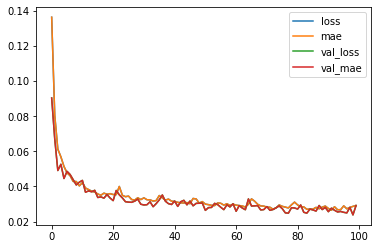

In [28]:
pd.DataFrame(history.history).plot()

In [29]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.0291 - mae: 0.0291


[0.029131829738616943, 0.029131829738616943]

In [30]:
model.predict(tf.expand_dims(tf.constant(X_test)[4],axis=0))

1/1 [==============================] - 0s 66ms/step


array([[0.19717744]], dtype=float32)

In [31]:
np.array(y_test)[4]

0.1997974272338587

In [32]:
np.array(y_test)[0] * max_charges

12609.88702

In [33]:
model.predict(tf.expand_dims(tf.constant(X_test)[0],axis=0)) * max_charges

1/1 [==============================] - 0s 20ms/step


array([[2747.0232]], dtype=float32)